# Aplicando filtros IIR e MA | COVID-19

Applied to number of deaths and infected in Brazil

Made by: Alexandre Russi Jr.

Personal website: https://www.alexandrerussi.com/

## Imports

In [3]:
import numpy as np
import pandas as pd
import scipy.signal as signal


import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [4]:
df = pd.read_excel('HIST_PAINEL_COVIDBR_06set2020.xlsx')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920903,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-02,36,3015268.0,164649,1151,2609,36,NaN,NaN,1.0
920904,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-03,36,3015268.0,165903,1254,2641,32,NaN,NaN,1.0
920905,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-04,36,3015268.0,167200,1297,2681,40,NaN,NaN,1.0
920906,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-09-05,36,3015268.0,168605,1405,2700,19,NaN,NaN,1.0


In [5]:
index = df.index
index

RangeIndex(start=0, stop=920908, step=1)

In [6]:
columns = df.columns
columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

In [16]:
df2 = df.loc[df['regiao'] == 'Brasil']
df2

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-02,36,210147125.0,3997865,46934,123780,1184,3210405.0,663680.0,NaN
191,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-03,36,210147125.0,4041638,43773,124614,834,3247610.0,669414.0,NaN
192,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-04,36,210147125.0,4092832,51194,125521,907,3278918.0,688393.0,NaN
193,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-05,36,210147125.0,4123000,30168,126203,682,3296702.0,700095.0,NaN


## Análise de casos por dia no Brasil

In [21]:
df_br_casos_diarios = df2[['data', 'casosNovos']]
df_br_casos_diarios

,data,casosNovos
0,2020-02-25,0
1,2020-02-26,1
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,1
...,...,...
190,2020-09-02,46934
191,2020-09-03,43773
192,2020-09-04,51194
193,2020-09-05,30168


### Calculando média móvel de 5, 15 e 30 dias.

In [22]:
df_br_casos_diarios['SMA_5'] = df_br_casos_diarios.iloc[:,1].rolling(window=5).mean()
df_br_casos_diarios['SMA_15'] = df_br_casos_diarios.iloc[:,1].rolling(window=15).mean()
df_br_casos_diarios['SMA_30'] = df_br_casos_diarios.iloc[:,1].rolling(window=30).mean()

df_br_casos_diarios

,data,casosNovos,SMA_5,SMA_15,SMA_30
0,2020-02-25,0,NaN,NaN,NaN
1,2020-02-26,1,NaN,NaN,NaN
2,2020-02-27,0,NaN,NaN,NaN
3,2020-02-28,0,NaN,NaN,NaN
4,2020-02-29,1,0.4,NaN,NaN
...,...,...,...,...,...
190,2020-09-02,46934,38612.4,39367.400000,41584.9
191,2020-09-03,43773,39097.0,38999.066667,41323.9
192,2020-09-04,51194,46104.2,39390.466667,41174.5
193,2020-09-05,30168,42945.6,39378.000000,40359.6


Gráfico de casos diárop de COVID-19 por data de notificação com médias móveis de 5, 15 e 30 dias.

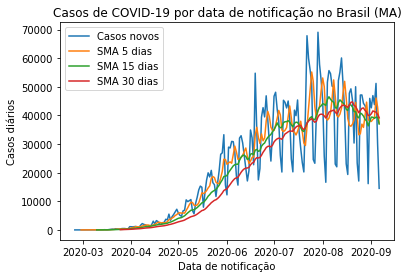

In [59]:
plt.plot(df_br_casos_diarios['data'], df_br_casos_diarios['casosNovos'], label='Casos novos')
plt.plot(df_br_casos_diarios['data'], df_br_casos_diarios['SMA_5'], label='SMA 5 dias')
plt.plot(df_br_casos_diarios['data'], df_br_casos_diarios['SMA_15'], label='SMA 15 dias')
plt.plot(df_br_casos_diarios['data'], df_br_casos_diarios['SMA_30'], label='SMA 30 dias')
plt.title('Casos de COVID-19 por data de notificação no Brasil (MA)')
plt.xlabel('Data de notificação')
plt.ylabel('Casos diários')
plt.legend(loc='best')
plt.savefig('graphs/casos_covid_media_movel.png')
plt.show()

### Aplicando filtro IIR (Resposta ao Impulso Infinito) -> Scilab

In [29]:
b, a = signal.iirfilter(N=3, Wn=50/len(df_br_casos_diarios['casosNovos']), btype='highpass', ftype='butter')
print(b)
print(a)

[ 0.43620188 -1.30860565  1.30860565 -0.43620188]
[ 1.         -1.42072749  0.87975364 -0.18913393]


In [42]:
df_csv = df_br_casos_diarios['casosNovos']
df_csv.to_csv('output/casos_novos.txt', sep=',', index=False, header=False)

## Análise de óbitos por dia no Brasil

In [44]:
df_br_ob = df.loc[df['regiao'] == 'Brasil']
df_br_ob = df_br_ob[['data', 'obitosNovos']]
df_br_ob

,data,obitosNovos
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,0
...,...,...
190,2020-09-02,1184
191,2020-09-03,834
192,2020-09-04,907
193,2020-09-05,682


### Calculando média móvel de 5, 15 e 30 dias.

In [45]:
df_br_ob['SMA_5'] = df_br_ob.iloc[:,1].rolling(window=5).mean()
df_br_ob['SMA_15'] = df_br_ob.iloc[:,1].rolling(window=15).mean()
df_br_ob['SMA_30'] = df_br_ob.iloc[:,1].rolling(window=30).mean()

df_br_ob

,data,obitosNovos,SMA_5,SMA_15,SMA_30
0,2020-02-25,0,NaN,NaN,NaN
1,2020-02-26,0,NaN,NaN,NaN
2,2020-02-27,0,NaN,NaN,NaN
3,2020-02-28,0,NaN,NaN,NaN
4,2020-02-29,0,0.0,NaN,NaN
...,...,...,...,...,...
190,2020-09-02,1184,855.2,926.133333,970.500000
191,2020-09-03,834,830.4,900.933333,959.833333
192,2020-09-04,907,938.6,881.133333,942.700000
193,2020-09-05,682,964.4,856.333333,923.666667


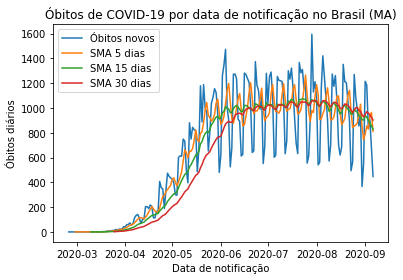

In [57]:
plt.plot(df_br_ob['data'], df_br_ob['obitosNovos'], label='Óbitos novos')
plt.plot(df_br_ob['data'], df_br_ob['SMA_5'], label='SMA 5 dias')
plt.plot(df_br_ob['data'], df_br_ob['SMA_15'], label='SMA 15 dias')
plt.plot(df_br_ob['data'], df_br_ob['SMA_30'], label='SMA 30 dias')
plt.title('Óbitos de COVID-19 por data de notificação no Brasil (MA)')
plt.xlabel('Data de notificação')
plt.ylabel('Óbitos diários')
plt.legend(loc='best')
plt.savefig('graphs/obitos_covid_media_movel.png')
plt.show()

### Aplicando filtro IIR (Resposta ao Impulso Infinito) -> Scilab

In [55]:
df_csv_ob = df_br_ob['obitosNovos']
df_csv_ob.to_csv('output/obitos_novos.txt', sep=',', index=False, header=False)